# 예제 1

## 예제 1-(1)

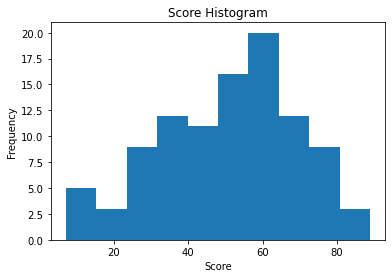

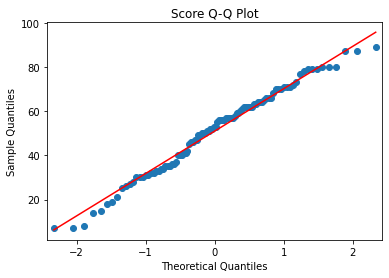

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

final_pd = pd.read_csv("final.csv")
final_pd = final_pd.loc[:, "score"]

# 히스토그램
plt.hist(final_pd.to_numpy(), bins = 10, histtype='bar')
plt.title("Score Histogram")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


# QQ-plot
QQ = ProbPlot(final_pd)
plot = QQ.qqplot(line = 's', color='C0', lw=1)
plt.title("Score Q-Q Plot")
plt.show()

## 결과해석
수강생들의 기말고사 성적을 히스토그램으로 표현하였을 때, 50~60점대에 많이 분포하고 있음을 알 수 있다.  
수강생들의 기말고사 성적을 QQ-Plot으로 표현하였을 때, 점들이 직선에 밀집되어 있어 정규분포에 가까움을 알 수 있다.

## 예제 1-(2)

In [11]:
from scipy.stats import norm
import math

x = norm.ppf(0.7, loc = 50, scale = 20)
print("A- 이상을 받을 수 있는 최소 성적:", math.ceil(x))

A- 이상을 받을 수 있는 최소 성적: 61


## 결과해석
수강생의 기말고사 점수를 X라 하고, X~N(50, 20^2)인 정규분포를 따른다고 가정하자.  
Pr(X ≤ x) = 0.7을 만족하는 x를 구하고 소수점을 올림한 값을 계산해보면 61점이 나온다.

## 예제 1-(3)

In [15]:
from scipy.stats import norm
import math

x = norm.cdf(70, loc = 50, scale = 20)
print("A- 이상을 받을 수 있는 수강생 수:", math.ceil((1-x)*100))

A- 이상을 받을 수 있는 수강생 수: 16


## 결과해석
수강생의 기말고사 점수를 X라 하고, X~N(50, 20^2)인 정규분포를 따른다고 가정하자.  
Pr(X ≤ 70) = x를 만족하는 x를 구하고, 전체 수강생 100명 중 (1-x)의 비율에 해당하는 수강생 수를 올림하면 16명이 나온다.

## 예제 1-(4)

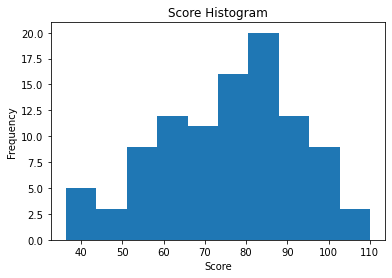

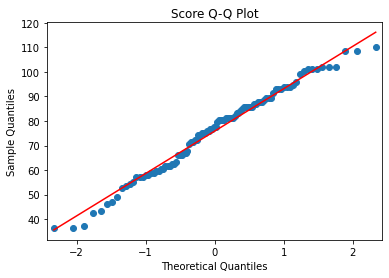

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

final_pd = pd.read_csv("final.csv")
final_pd = final_pd.loc[:, "score"]

def change(x):
    return 0.9 * x + 30
final_pd = final_pd.apply(change)

# 히스토그램
plt.hist(final_pd.to_numpy(), bins = 10, histtype='bar')
plt.title("Score Histogram")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


# QQ-plot
QQ = ProbPlot(final_pd)
plot = QQ.qqplot(line = 's', color='C0', lw=1)
plt.title("Score Q-Q Plot")
plt.show()

## 결과해석
final_pd에 저장되어 있는 값들 각각에 대해 0.9배 후 30을 더하는 처리를 진행하였다.
수강생들의 변환된 기말고사 성적을 히스토그램으로 표현하였을 때, 처리 전과 모양은 동일한 상태에서 분포하고 있는 Score의 값만 달라졌다.  
수강생들의 변환된 기말고사 성적을 QQ-Plot으로 표현하였을 때, 점들이 직선에 밀집되어 있어 여전히 정규분포에 가까움을 알 수 있다.

# 예제 2

## 예제 2-(1)

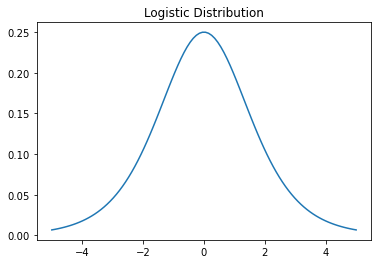

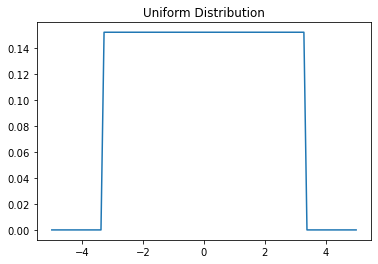

In [32]:
import numpy as np
from scipy.stats import logistic, uniform

x = np.linspace(-5, 5, 100)

# 로지스틱 분포
logX = logistic.pdf(x, loc = 0, scale = 1)
plt.title("Logistic Distribution")
plt.plot(x, logX)
plt.show()

# 균등 분포
uniX = uniform.pdf(x, loc=-((np.pi)**2)/3, scale = 2*((np.pi)**2)/3)
plt.title("Uniform Distribution")
plt.plot(x, uniX)

## 예제 2-(2)

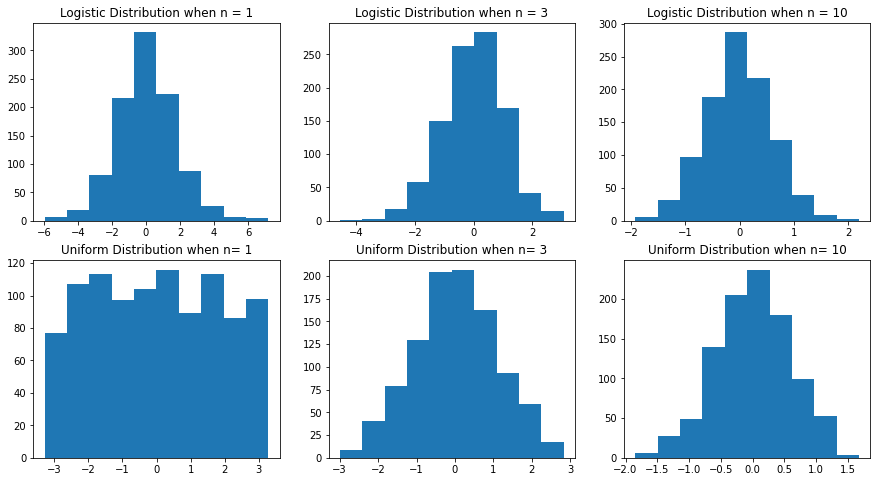

In [44]:
from scipy.stats import logistic, uniform
import numpy as np

np.random.seed(1)
Lmean1 = []
Lmean3 = []
Lmean10 = []
Umean1 = []
Umean3 = []
Umean10 = []
Lmean = [Lmean1, Lmean3, Lmean10]
Umean = [Umean1, Umean3, Umean10]

for i in range(1000):
    # Logistic 함수 (표본의 개수 = 1)
    l1 = logistic.rvs(loc = 0, scale = 1, size = 1)
    Lmean1.append(l1.mean())
    # Logistic 함수 (표본의 개수 = 3)
    l3 = logistic.rvs(loc = 0, scale = 1, size = 3)
    Lmean3.append(l3.mean())
    # Logistic 함수 (표본의 개수 = 10)
    l10 = logistic.rvs(loc = 0, scale = 1, size = 10)
    Lmean10.append(l10.mean())
    # Uniform 함수 (표본의 개수 = 1)
    u1 = uniform.rvs(loc = -((np.pi)**2)/3, scale = 2*((np.pi)**2)/3, size = 1)
    Umean1.append(u1.mean())
    # Uniform 함수 (표본의 개수 = 3)
    u3 = uniform.rvs(loc = -((np.pi)**2)/3, scale = 2*((np.pi)**2)/3, size = 3)
    Umean3.append(u3.mean())
    # Uniform 함수 (표본의 개수 = 10)
    u10 = uniform.rvs(loc = -((np.pi)**2)/3, scale = 2*((np.pi)**2)/3, size = 10)
    Umean10.append(u10.mean())
    
plt.figure(figsize = (15, 8))
n_list = [1, 3, 10]

for i in range(6):
    plt.subplot(2, 3, (i+1))
    if i < 3:
        plt.hist(Lmean[i%3])
        plt.title("Logistic Distribution when n = " + str(n_list[i%3]))
    else:
        plt.hist(Umean[i%3])
        plt.title("Uniform Distribution when n= " + str(n_list[i%3]))

plt.show()

## 결과해석
로지스틱 분포의 경우 n = 1부터 정규분포에 가까운 형태를 보여주는데, 표본의 개수가 커질수록 더욱 정규분포에 가까워진다.  
균등 분포의 경우, n = 1일 때에는 고르게 분포하는 형태를 보여주는데, 표본의 개수가 커질수록 정규분포에 가까워짐을 알 수 있다.

## 예제 2-(3)

로지스틱 분포의 경우 n = 1부터 정규분포에 가까운 형태를 보여주는데, 표본의 개수가 커질수록 더욱 정규분포에 가까워진다.  
균등 분포의 경우, n = 1일 때에는 고르게 분포하는 형태를 보여주는데, 표본의 개수가 커질수록 정규분포에 가까워짐을 알 수 있다.
즉, 두 분포 모두 표본의 갯수, n이 커질수록 정규분포에 근사함을 알 수 있다.

## 예제 2-(4)

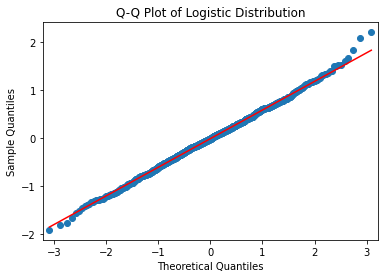

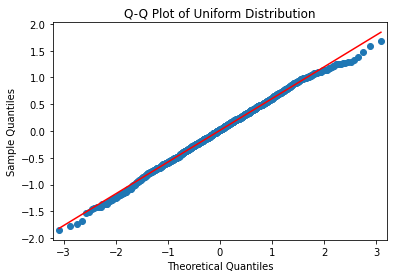

In [45]:
import pandas as pd

logistic_10 = pd.Series(Lmean[2])
uniform_10 = pd.Series(Umean[2])

# 로지스틱 분포 QQ-Plot
QQ = ProbPlot(logistic_10)
plot = QQ.qqplot(line = 's', color='C0', lw=1)
plt.title("Q-Q Plot of Logistic Distribution")
plt.show()

# 균등 분포 QQ-Plot
QQ = ProbPlot(uniform_10)
plot = QQ.qqplot(line = 's', color='C0', lw=1)
plt.title("Q-Q Plot of Uniform Distribution")
plt.show()

## 결과해석
로지스틱 분포와 정규 분포에서 표본 갯수 n=10으로 생성한 1000개의 표본평균들의 QQ-Plot을 그려보았다.  
두 분포의 QQ-Plot 모두 점들이 직선에 밀접하여 분포하기 때문에, 두 분포 모두 정규분포와 유사하다고 할 수 있다.

# 예제 3

## 예제 3-(1)

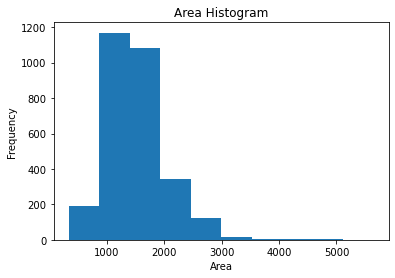

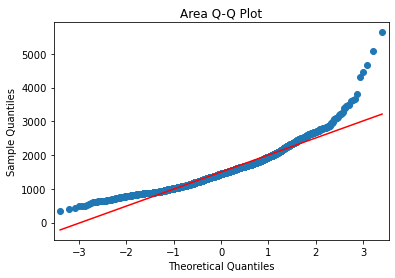

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot

pd = pd.read_csv("ames.csv")
pd = pd.loc[:, "Gr.Liv.Area"]

# 히스토그램
plt.hist(pd.to_numpy(), bins = 10, histtype='bar')
plt.title("Area Histogram")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()


# QQ-plot
QQ = ProbPlot(pd)
plot = QQ.qqplot(line = 's', color='C0', lw=1)
plt.title("Area Q-Q Plot")
plt.show()


## 결과해석
Gr.Liv.Area 데이터의 히스토그램을 보았을 때, 1000에서 2000 사이를 중심으로 대칭형으로 보이지만, 3000~5000대의 긴 꼬리가 형성되어있고,  
Gr.Liv.Area 데이터의 QQ-Plot을 보았을 때, 중심 부근에서는 점들이 직선에 밀접해 있지만, 양 끝에서 직선에서 크게 벗어나 있어,  
Gr.Liv.Area 데이터가 정규분포에 가깝다고 보기 제한된다.

## 예제 3-(2)

In [71]:
from scipy.stats import norm

mean = np.mean(pd)
std = np.std(pd)

x = norm.ppf(0.95, loc = mean, scale = std)


pd = pd.sort_values(ascending = False) # 내림차순으로 정렬 
y = pd.iloc[round(len(pd) * 0.05)] # 상위 5%의 값

print("정규분포를 따르는 집 크기의 상위 5%의 집의 크기:", x)
print("실제 상위 5%의 집의 크기:", y)

정규분포를 따르는 집 크기의 상위 5%의 집의 크기: 2331.0366664198436
실제 상위 5%의 집의 크기: 2464


## 결과해석
실제 데이터의 평균과 표준편차를 따르는 정규분포에서의 상위 5%를 만족하는 x값을 ppf을 사용하여 구하였다.  
이후 내림차순으로 데이터를 정렬한 뒤, 상위 5%에 위치하는 실제 값을 y값에 저장하였다.  
(전체 길이 len(pd) 2930건의 상위 5%는 146.5번째의 집의 크기인데, 이를 반올림하여 147번째 집의 크기로 선정하였다.)  

두 가지의 경우를 통해 구한 상위 5%의 집의 크기는 각각 2331과 2464로 근소한 차이가 있지만 대체로 유사함을 관찰할 수 있다.